# Intermezzo - Piece-wise linear sinus()
2021 08 3 Maarten Pennings

When modeling the sinus function, it seemed that the simpel model behaved like a piece-wise linear approximation. 
Some [investigation](piecewise-linear.ipynb) indicated that the two layer model could indeed implement a piece-wise linear curve. 

The next question I had: if I have a model with 9 + 1 neurons, the piece-wise linear investigation suggest that an approximation with 9 segments is possible. The training didn't find that. Can we configure by hand?


# Getting started
We start by importing `math` for sinus and `matploylib.pyplot` for plotting it.

In [1]:
import math
import matplotlib.pyplot as plt

We also use the `relu()` function which is not standard in Python.

In [2]:
def relu(x) : return max(0,x)

## The sinus()

Let us first set up the sinus data.

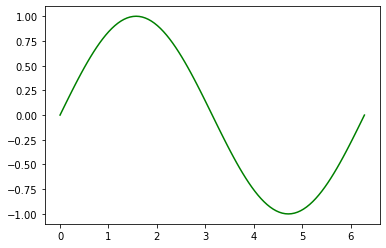

In [3]:
sinus_xs=[ 2*math.pi * t/100.0 for t in range(100+1)]
sinus_ys=[ math.sin(x) for x in sinus_xs ]

plt.plot(sinus_xs,sinus_ys,'g-');

As a next step, we add the knee-points. The `delta1` and `delta2` spread the knee-points evenly around the two extremes.

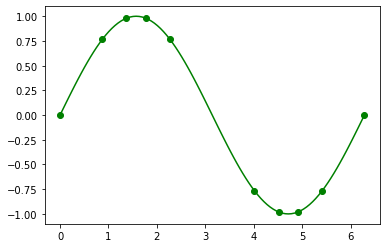

In [4]:
delta1 = 0.2
delta2 = 0.7
knee_xs = [ 0, 
            math.pi*1/2-delta2, math.pi*1/2-delta1, math.pi*1/2+delta1, math.pi*1/2+delta2,
            math.pi*3/2-delta2, math.pi*3/2-delta1, math.pi*3/2+delta1, math.pi*3/2+delta2,
            2*math.pi
          ]
knee_ys = [ math.sin(x) for x in knee_xs ]

plt.plot(sinus_xs,sinus_ys,'g-');
plt.plot(knee_xs,knee_ys,'go');

## Setting up the piece-wise linear approximation

We set up the first layer with 9 neurons, just like `model_1` in the [sinus notebook](sinus.ipynb) had.

As [piecewise linear notebook](piecewise-linear.ipynb) suggested, the weights are set to 1 and the biases to the x-ccordinate of the knee-points.

In [5]:
# Layer 1
def neuron_1_0(v_0) :
    weight_1_0 = 1
    bias_1_0   = -knee_xs[0]
    return relu( weight_1_0 * v_0 +bias_1_0 )

def neuron_1_1(v_0) :
    weight_1_1 = 1
    bias_1_1   = -knee_xs[1]
    return relu( weight_1_1 * v_0 +bias_1_1 )

def neuron_1_2(v_0) :
    weight_1_2 = 1
    bias_1_2   = -knee_xs[2]
    return relu( weight_1_2 * v_0 +bias_1_2 )

def neuron_1_3(v_0) :
    weight_1_3 = 1
    bias_1_3   = -knee_xs[3]
    return relu( weight_1_3 * v_0 +bias_1_3 )

def neuron_1_4(v_0) :
    weight_1_4 = 1
    bias_1_4   = -knee_xs[4]
    return relu( weight_1_4 * v_0 +bias_1_4 )

def neuron_1_5(v_0) :
    weight_1_5 = 1
    bias_1_5   = -knee_xs[5]
    return relu( weight_1_5 * v_0 +bias_1_5 )

def neuron_1_6(v_0) :
    weight_1_6 = 1
    bias_1_6   = -knee_xs[6]
    return relu( weight_1_6 * v_0 +bias_1_6 )

def neuron_1_7(v_0) :
    weight_1_7 = 1
    bias_1_7   = -knee_xs[7]
    return relu( weight_1_7 * v_0 +bias_1_7 )

def neuron_1_8(v_0) :
    weight_1_8 = 1
    bias_1_8   = -knee_xs[8]
    return relu( weight_1_8 * v_0 +bias_1_8 )

For the second layer, we need the slopes. We have 10 knee points (the lenght of e.g. `knee_xs`), and thus 9 segments, and thus 9 slopes (numbered 0 up to and including 8).

In [6]:
# layer 2
slope0 = (knee_ys[1]-knee_ys[0]) / (knee_xs[1]-knee_xs[0])
slope1 = (knee_ys[2]-knee_ys[1]) / (knee_xs[2]-knee_xs[1])
slope2 = (knee_ys[3]-knee_ys[2]) / (knee_xs[3]-knee_xs[2])
slope3 = (knee_ys[4]-knee_ys[3]) / (knee_xs[4]-knee_xs[3])
slope4 = (knee_ys[5]-knee_ys[4]) / (knee_xs[5]-knee_xs[4])
slope5 = (knee_ys[6]-knee_ys[5]) / (knee_xs[6]-knee_xs[5])
slope6 = (knee_ys[7]-knee_ys[6]) / (knee_xs[7]-knee_xs[6])
slope7 = (knee_ys[8]-knee_ys[7]) / (knee_xs[8]-knee_xs[7])
slope8 = (knee_ys[9]-knee_ys[8]) / (knee_xs[9]-knee_xs[8])

Layer 2 has one neuron. As [piecewise linear notebook](piecewise-linear.ipynb) suggested, the weight for segment _k_ is the slope for segment _k_ minus the slope for the previous segment.

In [7]:
# layer 2
def neuron_2(v_1_0, v_1_1, v_1_2, v_1_3, v_1_4, v_1_5, v_1_6, v_1_7, v_1_8) :
    weight_2_0 = slope0
    weight_2_1 = slope1 - slope0
    weight_2_2 = slope2 - slope1
    weight_2_3 = slope3 - slope2
    weight_2_4 = slope4 - slope3
    weight_2_5 = slope5 - slope4
    weight_2_6 = slope6 - slope5
    weight_2_7 = slope7 - slope6
    weight_2_8 = slope8 - slope7
    bias_2     = knee_xs[0]
    return (weight_2_0*v_1_0 + weight_2_1*v_1_1 + weight_2_2*v_1_2 + weight_2_3*v_1_3 + weight_2_4*v_1_4 +
        weight_2_5*v_1_5 + weight_2_6*v_1_6 + weight_2_7*v_1_7 + weight_2_8*v_1_8 + bias_2)

The next function defines the data flow through the whole network

In [8]:
# Network
def network(v_0) :
    v_1_0 = neuron_1_0(v_0)
    v_1_1 = neuron_1_1(v_0)
    v_1_2 = neuron_1_2(v_0)
    v_1_3 = neuron_1_3(v_0)
    v_1_4 = neuron_1_4(v_0)
    v_1_5 = neuron_1_5(v_0)
    v_1_6 = neuron_1_6(v_0)
    v_1_7 = neuron_1_7(v_0)
    v_1_8 = neuron_1_8(v_0)
    v_2   = neuron_2(v_1_0,v_1_1,v_1_2,v_1_3,v_1_4,v_1_5,v_1_6,v_1_7,v_1_8)
    return v_2

Let's now plot its graph

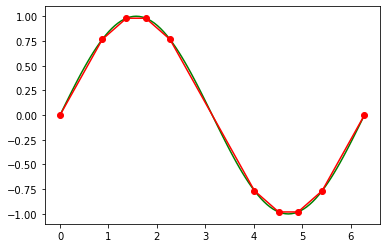

In [9]:
network_ys=[ network(x) for x in sinus_xs ]

plt.plot(sinus_xs,sinus_ys,'g-');
plt.plot(knee_xs,knee_ys,'ro');
plt.plot(sinus_xs,network_ys,'r-');

This looks good. Of course we could have written the layer code less repetitive, the code is small enough to allow repetition and we believe this eases understanding.

## Create a Tensorflow model for the piece-wise linear sinus approximation

We will now make a Tensorflow model for our piece-wise linear approximation of sinus. We start by importing some moduls and seeding the random number genertors (to ensure reproducibility).

In [10]:
import numpy as np
import tensorflow as tf

SEED = 42

np.random.seed(SEED)
tf.random.set_seed(SEED)

We create a model with exactly the same structure as `model_1` in the [sinus notebook](sinus.ipynb).

In [11]:
model_pwls = tf.keras.models.Sequential()
model_pwls.add( tf.keras.layers.Dense(9, activation='relu', input_shape=(1,)) )
model_pwls.add( tf.keras.layers.Dense(1) )
model_pwls.compile( optimizer='rmsprop', loss='mse', metrics=['mae'] )
model_pwls.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 9)                 18        
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 10        
Total params: 28
Trainable params: 28
Non-trainable params: 0
_________________________________________________________________


We have two layers, and the keras interface allows us to write the "weights" (weights and biases).

For the first layer, the weights are 1 and the biases the x-coordinates of the kneepoints (see previous section).

In [12]:
weights1 = np.array([[1,1,1,1,1,1,1,1,1]], dtype=np.float32)

biases1 = np.array([-knee_xs[0],-knee_xs[1],-knee_xs[2],-knee_xs[3],-knee_xs[4],-knee_xs[5],-knee_xs[6],-knee_xs[7],-knee_xs[8]], dtype=np.float32)

model_pwls.layers[0].set_weights([weights1,biases1])

For the second layer, the weights are pair wise differences of the slopes and the biase is the y-coordinate of the first kneepoint (see previous section).

In [13]:
weights2 = np.array([
  [slope0],
  [slope1 - slope0],
  [slope2 - slope1],
  [slope3 - slope2],
  [slope4 - slope3],
  [slope5 - slope4],
  [slope6 - slope5],
  [slope7 - slope6],
  [slope8 - slope7]
], dtype=np.float32)

biases2 = np.array([knee_xs[0]], dtype=np.float32)

model_pwls.layers[1].set_weights([weights2,biases2])

We can plot this manually configured model. It is much better than the result of training of the model as we did
in the [sinus notebook](sinus.ipynb)

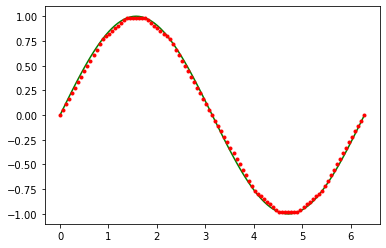

In [14]:
model_ys=[ model_pwls.predict([x])[0] for x in sinus_xs ]

plt.plot(sinus_xs,sinus_ys,'g-');
plt.plot(sinus_xs,model_ys,'r.');

## Training

The piece-wise linear approximation that we hand-crafted "inscribes" the sinus curve; in other words it is always too "small". What would happen if we train it further?

In [15]:
model_pwls.fit(sinus_xs, sinus_ys, epochs=1000, batch_size=8);

Epoch 1/1000
13/13 [==============================] - 0s 500us/step - loss: 0.0011 - mae: 0.0231
Epoch 2/1000
13/13 [==============================] - 0s 503us/step - loss: 6.4625e-04 - mae: 0.0198
Epoch 3/1000
13/13 [==============================] - 0s 500us/step - loss: 6.2931e-04 - mae: 0.0192
Epoch 4/1000
13/13 [==============================] - 0s 500us/step - loss: 6.1650e-04 - mae: 0.0188
Epoch 5/1000
13/13 [==============================] - 0s 500us/step - loss: 5.9657e-04 - mae: 0.0185
Epoch 6/1000
13/13 [==============================] - 0s 500us/step - loss: 5.8315e-04 - mae: 0.0183
Epoch 7/1000
13/13 [==============================] - 0s 500us/step - loss: 5.7151e-04 - mae: 0.0181
Epoch 8/1000
13/13 [==============================] - 0s 500us/step - loss: 5.6159e-04 - mae: 0.0179
Epoch 9/1000
13/13 [==============================] - 0s 500us/step - loss: 5.5271e-04 - mae: 0.0177
Epoch 10/1000
13/13 [==============================] - 0s 417us/step - loss: 5.4463e-04 - mae: 

13/13 [==============================] - 0s 500us/step - loss: 3.2749e-04 - mae: 0.0141
Epoch 82/1000
13/13 [==============================] - 0s 417us/step - loss: 4.8960e-04 - mae: 0.0149
Epoch 83/1000
13/13 [==============================] - 0s 417us/step - loss: 2.9616e-04 - mae: 0.0136
Epoch 84/1000
13/13 [==============================] - 0s 500us/step - loss: 3.1927e-04 - mae: 0.0133
Epoch 85/1000
13/13 [==============================] - 0s 417us/step - loss: 3.8695e-04 - mae: 0.0148
Epoch 86/1000
13/13 [==============================] - 0s 417us/step - loss: 3.3602e-04 - mae: 0.0142
Epoch 87/1000
13/13 [==============================] - 0s 417us/step - loss: 4.9958e-04 - mae: 0.0149
Epoch 88/1000
13/13 [==============================] - 0s 417us/step - loss: 2.8314e-04 - mae: 0.0133
Epoch 89/1000
13/13 [==============================] - 0s 417us/step - loss: 3.0769e-04 - mae: 0.0132
Epoch 90/1000
13/13 [==============================] - 0s 500us/step - loss: 3.9922e-04 - mae: 0

13/13 [==============================] - 0s 417us/step - loss: 3.3712e-04 - mae: 0.0140
Epoch 161/1000
13/13 [==============================] - 0s 417us/step - loss: 3.2201e-04 - mae: 0.0135
Epoch 162/1000
13/13 [==============================] - 0s 500us/step - loss: 2.8988e-04 - mae: 0.0133
Epoch 163/1000
13/13 [==============================] - 0s 417us/step - loss: 3.5536e-04 - mae: 0.0138
Epoch 164/1000
13/13 [==============================] - 0s 417us/step - loss: 2.6421e-04 - mae: 0.0124
Epoch 165/1000
13/13 [==============================] - 0s 417us/step - loss: 3.7042e-04 - mae: 0.0142
Epoch 166/1000
13/13 [==============================] - 0s 500us/step - loss: 3.1349e-04 - mae: 0.0139
Epoch 167/1000
13/13 [==============================] - 0s 417us/step - loss: 3.3134e-04 - mae: 0.0135
Epoch 168/1000
13/13 [==============================] - 0s 417us/step - loss: 4.3469e-04 - mae: 0.0142
Epoch 169/1000
13/13 [==============================] - 0s 417us/step - loss: 2.0290e-04

13/13 [==============================] - 0s 417us/step - loss: 3.6050e-04 - mae: 0.0142
Epoch 240/1000
13/13 [==============================] - 0s 417us/step - loss: 2.6619e-04 - mae: 0.0126
Epoch 241/1000
13/13 [==============================] - 0s 417us/step - loss: 3.2931e-04 - mae: 0.0138
Epoch 242/1000
13/13 [==============================] - 0s 417us/step - loss: 3.2624e-04 - mae: 0.0134
Epoch 243/1000
13/13 [==============================] - 0s 500us/step - loss: 2.8767e-04 - mae: 0.0133
Epoch 244/1000
13/13 [==============================] - 0s 417us/step - loss: 3.5499e-04 - mae: 0.0138
Epoch 245/1000
13/13 [==============================] - 0s 417us/step - loss: 2.7698e-04 - mae: 0.0129
Epoch 246/1000
13/13 [==============================] - 0s 500us/step - loss: 3.5981e-04 - mae: 0.0140
Epoch 247/1000
13/13 [==============================] - 0s 500us/step - loss: 3.2623e-04 - mae: 0.0140
Epoch 248/1000
13/13 [==============================] - 0s 417us/step - loss: 3.1986e-04

13/13 [==============================] - 0s 500us/step - loss: 3.2466e-04 - mae: 0.0138
Epoch 319/1000
13/13 [==============================] - 0s 417us/step - loss: 3.2317e-04 - mae: 0.0132
Epoch 320/1000
13/13 [==============================] - 0s 500us/step - loss: 3.5624e-04 - mae: 0.0136
Epoch 321/1000
13/13 [==============================] - 0s 500us/step - loss: 2.7703e-04 - mae: 0.0129
Epoch 322/1000
13/13 [==============================] - 0s 417us/step - loss: 3.4390e-04 - mae: 0.0134
Epoch 323/1000
13/13 [==============================] - 0s 417us/step - loss: 3.5749e-04 - mae: 0.0136
Epoch 324/1000
13/13 [==============================] - 0s 417us/step - loss: 2.6410e-04 - mae: 0.0127
Epoch 325/1000
13/13 [==============================] - 0s 417us/step - loss: 3.5337e-04 - mae: 0.0136
Epoch 326/1000
13/13 [==============================] - 0s 417us/step - loss: 2.7468e-04 - mae: 0.0127
Epoch 327/1000
13/13 [==============================] - 0s 500us/step - loss: 3.5812e-04

13/13 [==============================] - 0s 417us/step - loss: 3.0700e-04 - mae: 0.0132
Epoch 398/1000
13/13 [==============================] - 0s 417us/step - loss: 2.3777e-04 - mae: 0.0117
Epoch 399/1000
13/13 [==============================] - 0s 500us/step - loss: 3.8302e-04 - mae: 0.0142
Epoch 400/1000
13/13 [==============================] - 0s 500us/step - loss: 2.7322e-04 - mae: 0.0127
Epoch 401/1000
13/13 [==============================] - 0s 417us/step - loss: 3.5413e-04 - mae: 0.0139
Epoch 402/1000
13/13 [==============================] - 0s 417us/step - loss: 2.7450e-04 - mae: 0.0127
Epoch 403/1000
13/13 [==============================] - 0s 500us/step - loss: 3.5218e-04 - mae: 0.0139
Epoch 404/1000
13/13 [==============================] - 0s 417us/step - loss: 2.5303e-04 - mae: 0.0118
Epoch 405/1000
13/13 [==============================] - 0s 417us/step - loss: 3.6578e-04 - mae: 0.0139
Epoch 406/1000
13/13 [==============================] - 0s 500us/step - loss: 3.6979e-04

13/13 [==============================] - 0s 500us/step - loss: 3.0949e-04 - mae: 0.0133
Epoch 477/1000
13/13 [==============================] - 0s 417us/step - loss: 2.7556e-04 - mae: 0.0129
Epoch 478/1000
13/13 [==============================] - 0s 417us/step - loss: 3.5559e-04 - mae: 0.0139
Epoch 479/1000
13/13 [==============================] - 0s 417us/step - loss: 2.7323e-04 - mae: 0.0127
Epoch 480/1000
13/13 [==============================] - 0s 500us/step - loss: 3.5522e-04 - mae: 0.0139
Epoch 481/1000
13/13 [==============================] - 0s 417us/step - loss: 2.7035e-04 - mae: 0.0126
Epoch 482/1000
13/13 [==============================] - 0s 333us/step - loss: 3.5581e-04 - mae: 0.0139
Epoch 483/1000
13/13 [==============================] - 0s 417us/step - loss: 2.4365e-04 - mae: 0.0118
Epoch 484/1000
13/13 [==============================] - 0s 417us/step - loss: 3.7734e-04 - mae: 0.0140
Epoch 485/1000
13/13 [==============================] - 0s 500us/step - loss: 3.7541e-04

13/13 [==============================] - 0s 500us/step - loss: 3.0234e-04 - mae: 0.0131
Epoch 556/1000
13/13 [==============================] - 0s 417us/step - loss: 3.5739e-04 - mae: 0.0134
Epoch 557/1000
13/13 [==============================] - 0s 416us/step - loss: 4.1042e-04 - mae: 0.0138
Epoch 558/1000
13/13 [==============================] - 0s 500us/step - loss: 1.9928e-04 - mae: 0.0114
Epoch 559/1000
13/13 [==============================] - 0s 417us/step - loss: 3.2402e-04 - mae: 0.0138
Epoch 560/1000
13/13 [==============================] - 0s 500us/step - loss: 3.1631e-04 - mae: 0.0133
Epoch 561/1000
13/13 [==============================] - 0s 417us/step - loss: 2.8241e-04 - mae: 0.0128
Epoch 562/1000
13/13 [==============================] - 0s 417us/step - loss: 3.5025e-04 - mae: 0.0139
Epoch 563/1000
13/13 [==============================] - 0s 417us/step - loss: 3.3364e-04 - mae: 0.0138
Epoch 564/1000
13/13 [==============================] - 0s 417us/step - loss: 3.0179e-04

13/13 [==============================] - 0s 417us/step - loss: 3.2550e-04 - mae: 0.0135
Epoch 635/1000
13/13 [==============================] - 0s 417us/step - loss: 3.3234e-04 - mae: 0.0128
Epoch 636/1000
13/13 [==============================] - 0s 417us/step - loss: 2.6626e-04 - mae: 0.0127
Epoch 637/1000
13/13 [==============================] - 0s 417us/step - loss: 3.6175e-04 - mae: 0.0141
Epoch 638/1000
13/13 [==============================] - 0s 417us/step - loss: 3.5645e-04 - mae: 0.0139
Epoch 639/1000
13/13 [==============================] - 0s 500us/step - loss: 2.6801e-04 - mae: 0.0125
Epoch 640/1000
13/13 [==============================] - 0s 417us/step - loss: 3.1222e-04 - mae: 0.0133
Epoch 641/1000
13/13 [==============================] - 0s 500us/step - loss: 3.2468e-04 - mae: 0.0136
Epoch 642/1000
13/13 [==============================] - 0s 500us/step - loss: 3.0870e-04 - mae: 0.0132
Epoch 643/1000
13/13 [==============================] - 0s 500us/step - loss: 3.0847e-04

13/13 [==============================] - 0s 417us/step - loss: 3.1518e-04 - mae: 0.0132
Epoch 714/1000
13/13 [==============================] - 0s 333us/step - loss: 1.8116e-04 - mae: 0.0106
Epoch 715/1000
13/13 [==============================] - 0s 417us/step - loss: 4.2119e-04 - mae: 0.0145
Epoch 716/1000
13/13 [==============================] - 0s 417us/step - loss: 2.4954e-04 - mae: 0.0119
Epoch 717/1000
13/13 [==============================] - 0s 500us/step - loss: 3.6218e-04 - mae: 0.0139
Epoch 718/1000
13/13 [==============================] - 0s 417us/step - loss: 3.6674e-04 - mae: 0.0147
Epoch 719/1000
13/13 [==============================] - 0s 417us/step - loss: 2.8849e-04 - mae: 0.0130
Epoch 720/1000
13/13 [==============================] - 0s 417us/step - loss: 3.1564e-04 - mae: 0.0132
Epoch 721/1000
13/13 [==============================] - 0s 417us/step - loss: 2.7883e-04 - mae: 0.0127
Epoch 722/1000
13/13 [==============================] - 0s 500us/step - loss: 3.4323e-04

13/13 [==============================] - 0s 417us/step - loss: 2.9210e-04 - mae: 0.0131
Epoch 793/1000
13/13 [==============================] - 0s 417us/step - loss: 3.1680e-04 - mae: 0.0132
Epoch 794/1000
13/13 [==============================] - 0s 500us/step - loss: 2.8427e-04 - mae: 0.0129
Epoch 795/1000
13/13 [==============================] - 0s 417us/step - loss: 3.4448e-04 - mae: 0.0139
Epoch 796/1000
13/13 [==============================] - 0s 417us/step - loss: 3.2262e-04 - mae: 0.0135
Epoch 797/1000
13/13 [==============================] - 0s 417us/step - loss: 3.1181e-04 - mae: 0.0133
Epoch 798/1000
13/13 [==============================] - 0s 417us/step - loss: 3.2511e-04 - mae: 0.0135
Epoch 799/1000
13/13 [==============================] - 0s 417us/step - loss: 3.0496e-04 - mae: 0.0132
Epoch 800/1000
13/13 [==============================] - 0s 417us/step - loss: 3.2954e-04 - mae: 0.0136
Epoch 801/1000
13/13 [==============================] - 0s 417us/step - loss: 2.9534e-04

13/13 [==============================] - 0s 417us/step - loss: 3.5939e-04 - mae: 0.0136
Epoch 872/1000
13/13 [==============================] - 0s 417us/step - loss: 3.4202e-04 - mae: 0.0138
Epoch 873/1000
13/13 [==============================] - 0s 500us/step - loss: 2.5835e-04 - mae: 0.0125
Epoch 874/1000
13/13 [==============================] - 0s 500us/step - loss: 3.4464e-04 - mae: 0.0136
Epoch 875/1000
13/13 [==============================] - 0s 417us/step - loss: 2.8430e-04 - mae: 0.0130
Epoch 876/1000
13/13 [==============================] - 0s 500us/step - loss: 3.4298e-04 - mae: 0.0138
Epoch 877/1000
13/13 [==============================] - 0s 500us/step - loss: 3.2476e-04 - mae: 0.0135
Epoch 878/1000
13/13 [==============================] - 0s 417us/step - loss: 3.0433e-04 - mae: 0.0132
Epoch 879/1000
13/13 [==============================] - 0s 417us/step - loss: 3.2365e-04 - mae: 0.0135
Epoch 880/1000
13/13 [==============================] - 0s 500us/step - loss: 2.9820e-04

13/13 [==============================] - 0s 417us/step - loss: 3.1175e-04 - mae: 0.0133
Epoch 951/1000
13/13 [==============================] - 0s 417us/step - loss: 3.4842e-04 - mae: 0.0137
Epoch 952/1000
13/13 [==============================] - 0s 417us/step - loss: 2.7678e-04 - mae: 0.0125
Epoch 953/1000
13/13 [==============================] - 0s 417us/step - loss: 3.1920e-04 - mae: 0.0133
Epoch 954/1000
13/13 [==============================] - 0s 417us/step - loss: 3.7169e-04 - mae: 0.0150
Epoch 955/1000
13/13 [==============================] - 0s 500us/step - loss: 2.9977e-04 - mae: 0.0131
Epoch 956/1000
13/13 [==============================] - 0s 417us/step - loss: 3.1048e-04 - mae: 0.0131
Epoch 957/1000
13/13 [==============================] - 0s 417us/step - loss: 2.8676e-04 - mae: 0.0130
Epoch 958/1000
13/13 [==============================] - 0s 500us/step - loss: 3.3762e-04 - mae: 0.0136
Epoch 959/1000
13/13 [==============================] - 0s 417us/step - loss: 3.0764e-04

If we plot the new prodictions, we see a slight shift, but nothing spectectular. The mae roughly halves from 0.0231 to 0.0117.

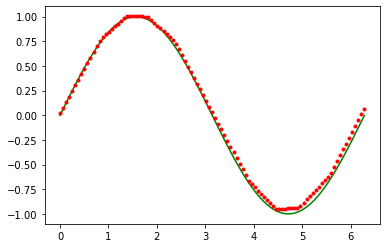

In [16]:
model_ys=[ model_pwls.predict([x])[0] for x in sinus_xs ]

plt.plot(sinus_xs,sinus_ys,'g-');
plt.plot(sinus_xs,model_ys,'r.');

(end)